# Euler-Maruyama method

In this notebook the Euler-Maruyama method is implemented and tested.
A numerical simulation of the SDE

$$ dX(t) = f(t,X(t))dt + g(t,X(t))dW(t) \qquad t \in [0,T] \qquad X(0) = X_{0} $$

can be obtained by employing the Euler-Maruyama method.



In [81]:
import numpy as np
from matplotlib import pyplot as plt  

The first goal is to write a function which computes approximations of $m$ paths of the Wiener process up to time $T$, each of them discretized with $Nw$ points. 

Hereby the stochastic process ${W_t : t\in [0,T]}$ is called a standard Brownian motion or standard Wiener process if it has the following properties:

1. W_0 = 0 (with probability one)

2. Independent increments: For all $0 \leq t_1 < t_2 < \dots < t_n < T$ the random variables 
$$ W_{t_2} - W_{t_2} \qquad W_{t_3} - W_{t_2}  \qquad \dots $$
are independent. 

3. $W_t - W_s \thicksim N(0,t-s)$ for any $ 0 \leq s < t < T$ 

4. The path is continous

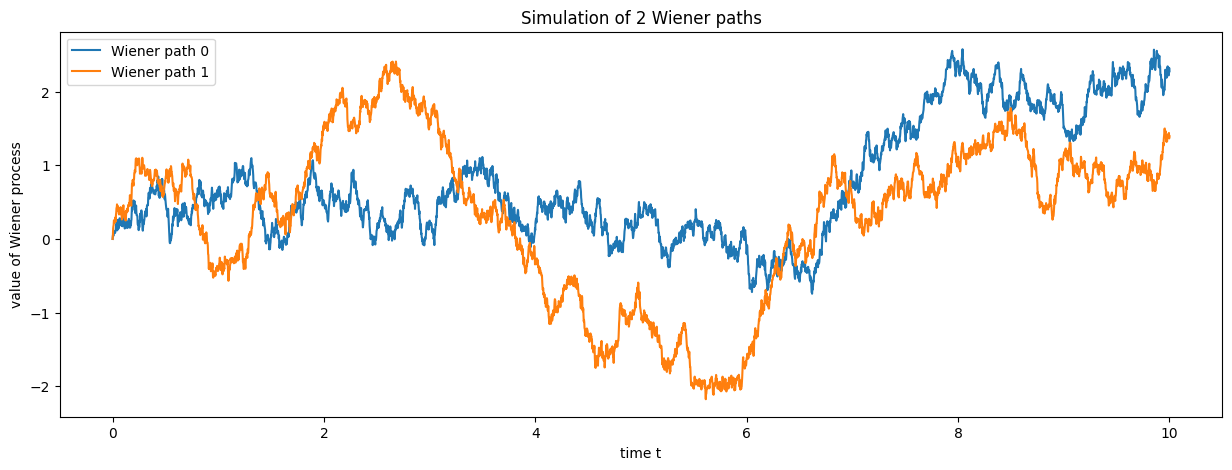

In [322]:
def wienerprocess(T,N,m):
    # Define the timesteps
    t = np.linspace(0,T,N+1)
    tau = T/N
    
    # Calculate for each m the Wiener process
    W = np.zeros((m,Nw+1))
    for i in range(m):
        Z = np.random.normal(0,1,size=Nw) * np.sqrt(tau)
        W[i,1:] = np.cumsum(Z)
    return t, W

# Define the parameters
T = 10
Nw = 2**12
m = 2

# Create a Wienerprocess
tw, W = wienerprocess(T,Nw,m)

# Visualize the Wiener process
plt.figure(figsize=(15,5))
for i in range(m):
    plt.plot(tw, W[i,:],label = f"Wiener path {i}")
plt.xlabel('time t')
plt.ylabel('value of Wiener process')
plt.title(f"Simulation of {m} Wiener paths")
plt.legend()

The next goal is to define a function which computes approximations of the SDE from above using the Euler-Maruyama method. 

Hereby we choose an $N \in \mathbb{N}$ and define the step-size $\tau = T/N$. For $n=1, \dots, N $ let $t_n = n\tau$ and compute the approximation $X_n \thickapprox X(t_n) $ as

$$ X_{n+1} = X_{n} + \tau f(t_n, X_n) + g(t_n, X_n) \Delta W_n  $$

with $\Delta W_n = W(t_{n+1} - W(t_n))$.

In [323]:
def eulerMaruyama(f, g, X0, T, W):
    m, N = W.shape
    N = N - 1
    tau = T/N
    t = np.linspace(0,T,N+1)
    X = np.zeros((m,N+1))
    X[:,0] = X0
    increments = W[:,1:N+1] - W[:,0:N]
    
    for n in range(N):
        t_n = (n-1) * tau
        X[:,n+1] = X[:,n] + tau * f(t_n , X[:,n]) + g(t_n , X[:,n]) * increments[:,n]
        
    return t, X

Now we want to solve the following SDE with the Euler-Maruyama method.

$$ dS(t) = \mu S(t)dt + \sigma S(t) dW(t) \qquad t \in [0,T] \qquad S(0) = S_0 $$

This SDE describes the Geometric Brownian motion, with $\mu,\sigma > 0$, inital condition $0 \leq S_0 $ and the Wiener process $W(t)$.

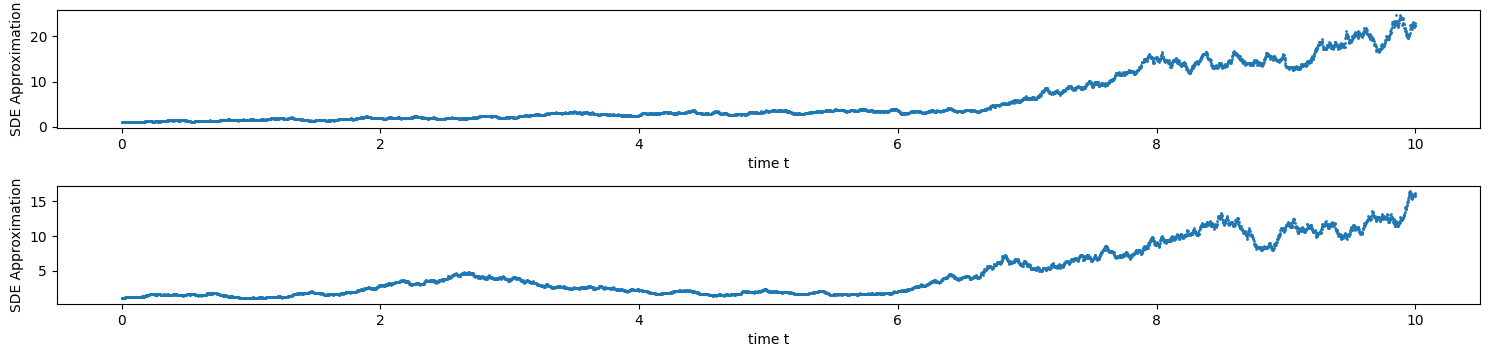

In [327]:
# Parameters
mu = 0.3
sigma = 0.4
S0 = 1 

# Define the functions for the SDE
def f(t,X):
    return mu * X

def g(t,X):
    return sigma * X

# Calculate the SDE Approximations
tx, X = eulerMaruyama(f,g, X0 = S0, T= 10, W= W)

plt.figure(figsize=(15,5),layout = 'tight')
for i in range(m):
    plt.subplot(3,1,i+1)
    plt.scatter(tx, X[i,:], s= 1)
    plt.xlabel('time t')
    plt.ylabel('SDE Approximation')
    

In order to compare the approximation of the Euler-Maruyama method we can compare it with the exact solution of the GBM since it is given by

$$ S(t) = S_0 exp(at+\sigma W(t)), \qquad a = \mu - \frac{\sigma^{2}}{2} \qquad t \in [0,T] $$

for the Wiener paths from above with $S_0 = 1, \mu = 0.3, \sigma = 0.4$.

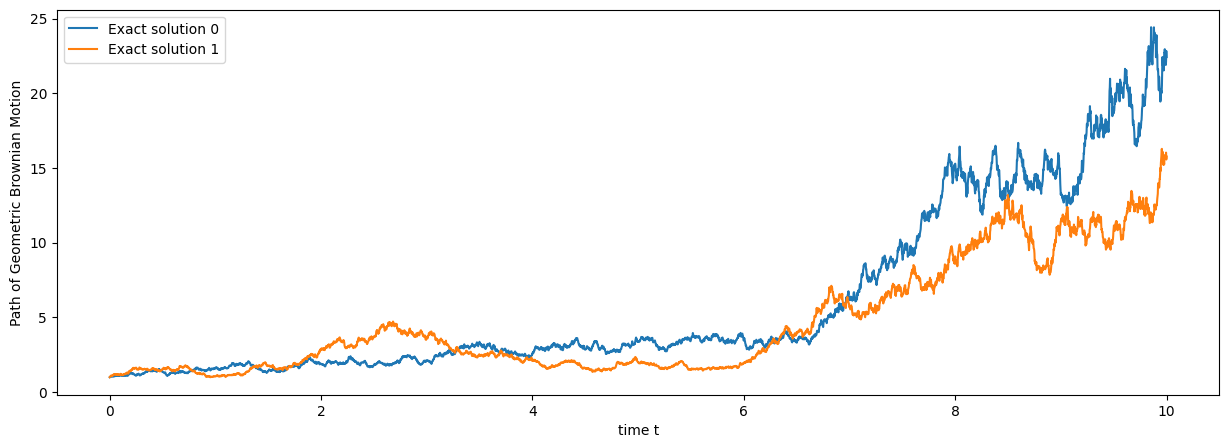

In [337]:
# Define the exact solution of the GBM
def exact_solution_GBM(t, mu, sigma, S0, W):
    a = mu - (sigma**2)/2
    return S0 * np.exp(( np.array(t) * a + sigma * W))
         
# Visualize the exact solution of the GBM            
plt.figure(figsize=(15,5))
for i in range(m):
    plt.plot(tw,exact_solution_GBM(tw,mu,sigma,S0,W)[i,:], label=f"Exact solution {i}")
    plt.xlabel('time t')
    plt.ylabel('Path of Geometric Brownian Motion')
plt.legend()
    

Finally we can plot the Euler-Maruyama approximations for $N = 2^6, 2^7, 2^8, 2^{10} $ against time and compare them with the true solution of the GBM of one Wiener paths.

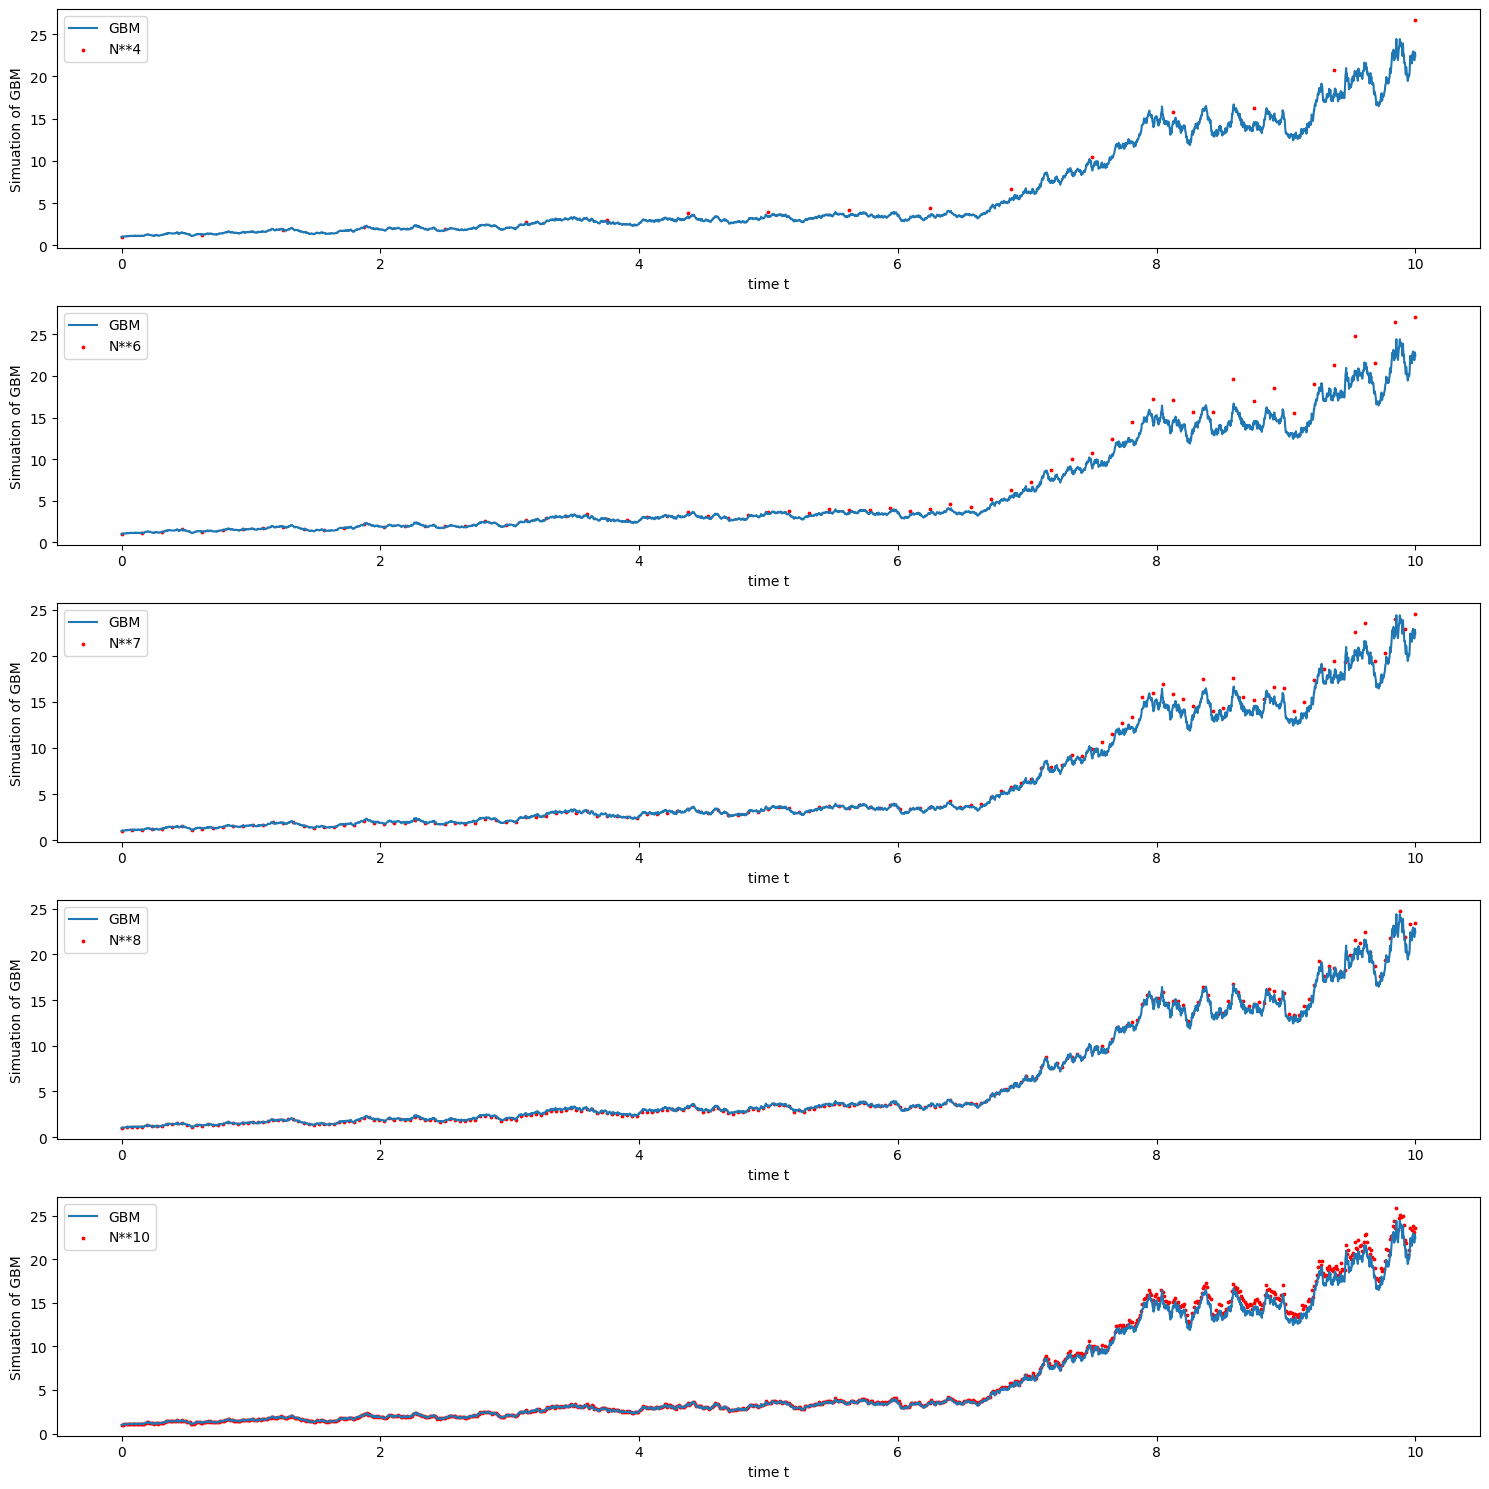

In [342]:
# plt.plot(tw,exact_solution_GBM(tw,mu,sigma,S0,W)[0,:],label='GBM')

Exponents = np.array([4,6,7,8,10])
number_exp = len(Exponents)

plt.figure(figsize= (15,15), layout = 'tight')
for i in range(number_exp):
    plt.subplot(number_exp,1,i+1)
    N_x = 2**Exponents[i]
    k = Nw/N_x
    tx , X = eulerMaruyama(f,g, X0= S0, T= T, W= W[:, ::int(k)])
    plt.plot(tw,exact_solution_GBM(tw,mu,sigma,S0,W)[0,:],label='GBM')
    plt.scatter(tx, X[0,:], s=3, color = 'red', label =f"N**{Exponents[i]}")
    plt.xlabel('time t')
    plt.ylabel('Simuation of GBM')
    plt.legend()
    
